# EDA (Exploratory Data Analysis)

## Import libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [133]:
df = pd.read_csv("./data/data.csv")

## Understanding the data

In [134]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [59]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [60]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [61]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

## Data vizualisation

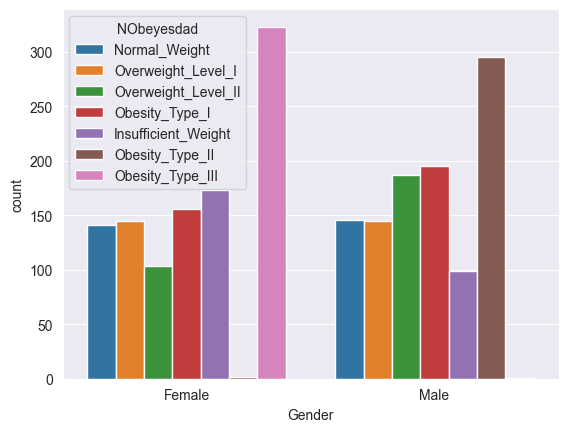

In [62]:
sns.countplot(data=df, x='Gender', hue='NObeyesdad')
plt.show()

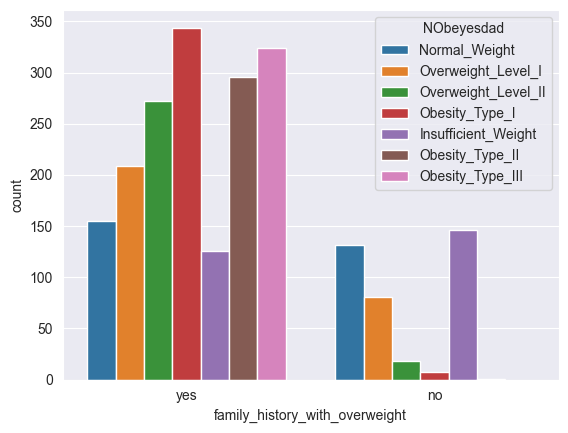

In [63]:
sns.countplot(data=df, x='family_history_with_overweight', hue='NObeyesdad')
plt.show()

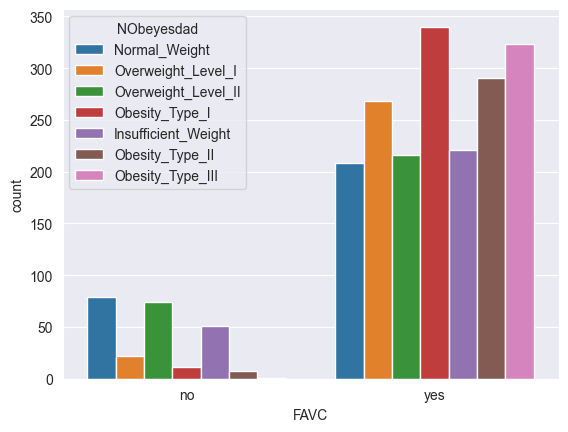

In [64]:
sns.countplot(data=df, x='FAVC', hue='NObeyesdad')
plt.show()

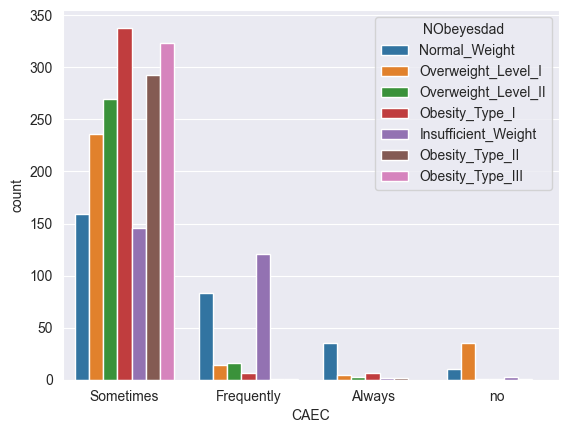

In [65]:
sns.countplot(data=df, x='CAEC', hue='NObeyesdad')
plt.show()

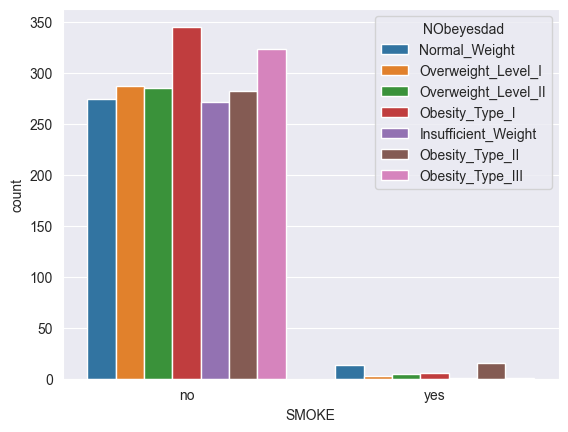

In [66]:
sns.countplot(data=df, x='SMOKE', hue='NObeyesdad')
plt.show()

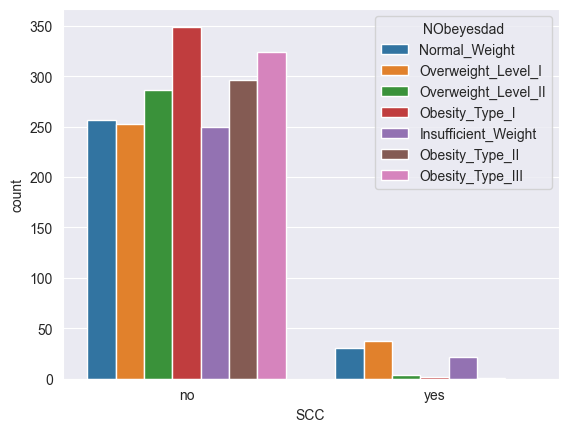

In [67]:
sns.countplot(data=df, x='SCC', hue='NObeyesdad')
plt.show()

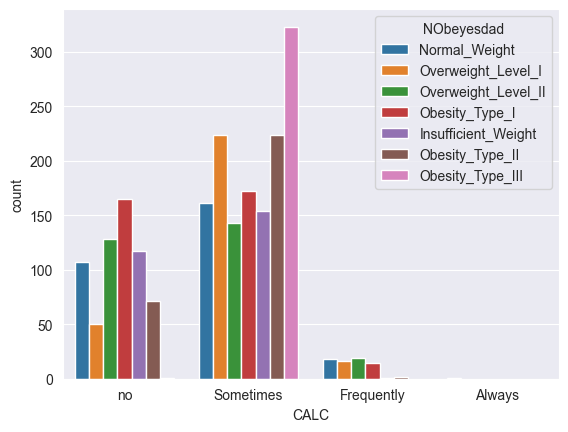

In [68]:
sns.countplot(data=df, x='CALC', hue='NObeyesdad')
plt.show()

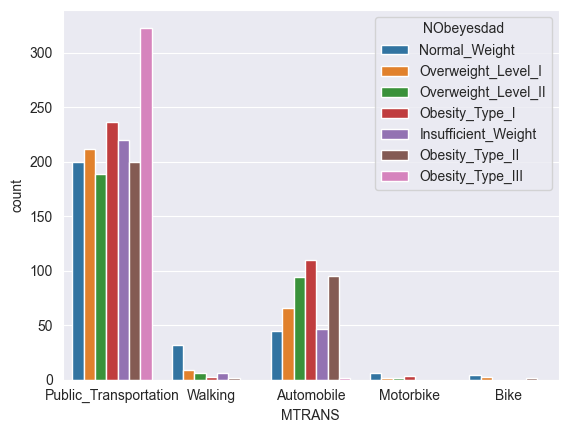

In [69]:
sns.countplot(data=df, x='MTRANS', hue='NObeyesdad')
plt.show()

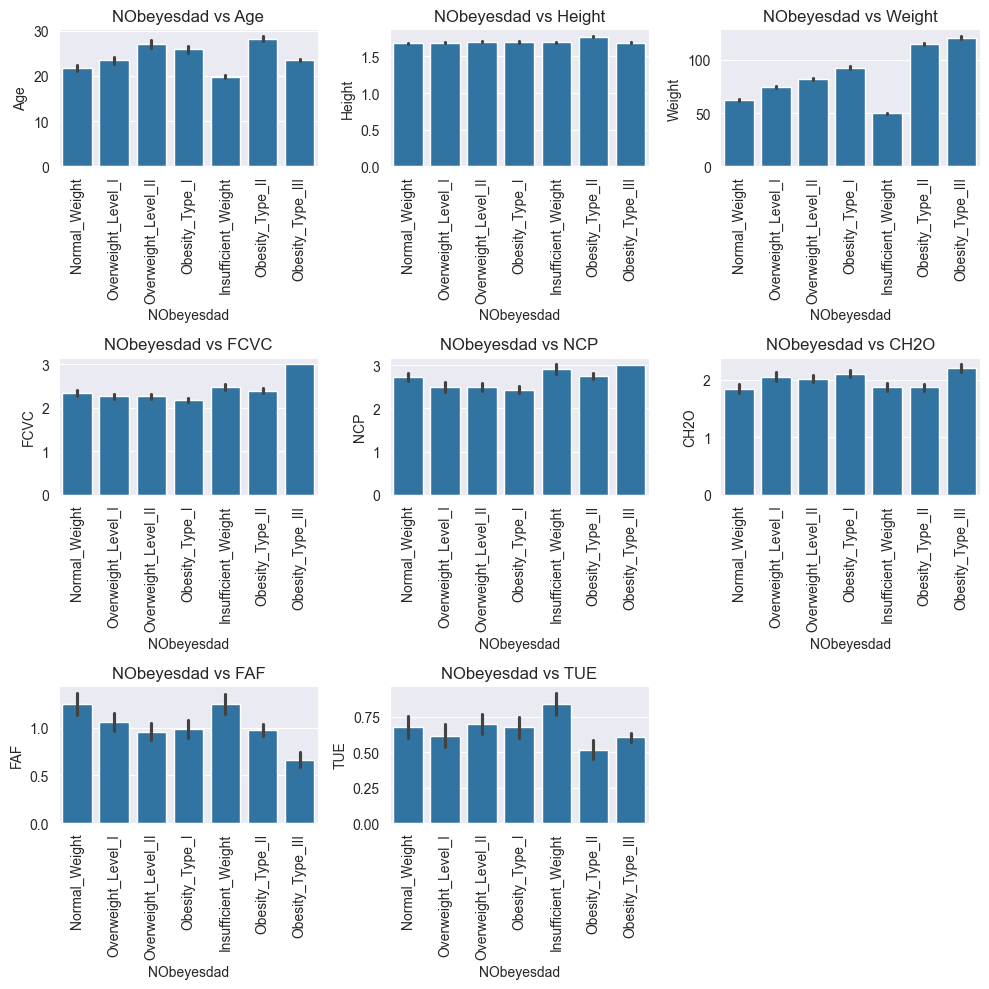

In [70]:
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.barplot(x='NObeyesdad', y=column, data=df, dodge=True, ax=axes[i])
    axes[i].set_title(f'NObeyesdad vs {column}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90) 
    

for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Building model & Evaluation

## Data preparation

### Encoding the categorical columns

In [135]:
# Create a label encoder object
le = LabelEncoder()

# Get the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder on each of the categorical columns:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"{col} mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Gender mapping: {'Female': 0, 'Male': 1}
family_history_with_overweight mapping: {'no': 0, 'yes': 1}
FAVC mapping: {'no': 0, 'yes': 1}
CAEC mapping: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
SMOKE mapping: {'no': 0, 'yes': 1}
SCC mapping: {'no': 0, 'yes': 1}
CALC mapping: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
MTRANS mapping: {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
NObeyesdad mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


### Splitting data into train / val / test sets

In [76]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Keeping 80% of the data for training, 10% for validation and 10% for testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Finding the best model

In [82]:
# Define the models and parameters
classifiers = {
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [1, 5, 10, 15, 20], 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}),
    'LogisticRegression': (LogisticRegression(multi_class='multinomial'), {'C': [0.1, 1, 5, 10], 'max_iter': [100, 200, 300]}),
    'SVM': (SVC(), {'C': [0.1, 1, 5, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'poly', 'sigmoid']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    'XGBoost': (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [1, 5, 10, 15, 20], 'criterion': ['gini', 'entropy']}),
    'MLPClassifier': (MLPClassifier(learning_rate='adaptive', early_stopping=True), {'hidden_layer_sizes': [(64,), (128,)], 'solver': ['adam', 'sgd'], 'learning_rate_init': [0.0025, 0.0050], 'max_iter': [100, 150, 200], 'batch_size': [20, 40, 60, 80], 'activation': ['relu', 'tanh'], 'alpha': [0.1, 0.01]})
}

# Apply GridSearchCV to each classifier
for name, (model, params) in classifiers.items():
    gs = GridSearchCV(model, params, cv=5)
    gs.fit(X_train, y_train)
    print(f"Best parameters for {name}: {gs.best_params_}")
    print(f"Best score for {name}: {gs.best_score_}")
    print(f"Validation score for {name}: {gs.score(X_val, y_val)}")

Best parameters for DecisionTree: {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}
Best score for DecisionTree: 0.9502379154741629
Validation score for DecisionTree: 0.943127962085308
Best parameters for LogisticRegression: {'C': 10, 'max_iter': 300}
Best score for LogisticRegression: 0.7470352747001914
Validation score for LogisticRegression: 0.7440758293838863
Best parameters for SVM: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Best score for SVM: 0.9514266149280987
Validation score for SVM: 0.966824644549763
Best parameters for KNN: {'algorithm': 'ball_tree', 'n_neighbors': 3}
Best score for KNN: 0.8720541499130864
Validation score for KNN: 0.8815165876777251
Best parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 200}
Best score for XGBoost: 0.9650553965550543
Validation score for XGBoost: 0.943127962085308
Best parameters for RandomForest: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
Best score for RandomForest: 0.9549804224536022
Validation sc

## Training and evaluating the model:

In [119]:
# Create a new XGBClassifier with the best parameters
model = XGBClassifier(learning_rate=0.2, n_estimators=200)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [149]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print(f"Accuracy: {round(accuracy * 100, 2)}%")
print(f"Precision: {round(precision * 100, 2)}%")
print(f"Recall: {round(recall * 100, 2)}%")
print(f"F1 Score: {round(f1 * 100, 2)}%")
print(f"AUC-ROC: {round(roc_auc * 100, 2)}%")

Accuracy: 97.17%
Precision: 97.26%
Recall: 97.17%
F1 Score: 97.15%
AUC-ROC: 99.85%


Text(95.72222222222221, 0.5, 'Truth')

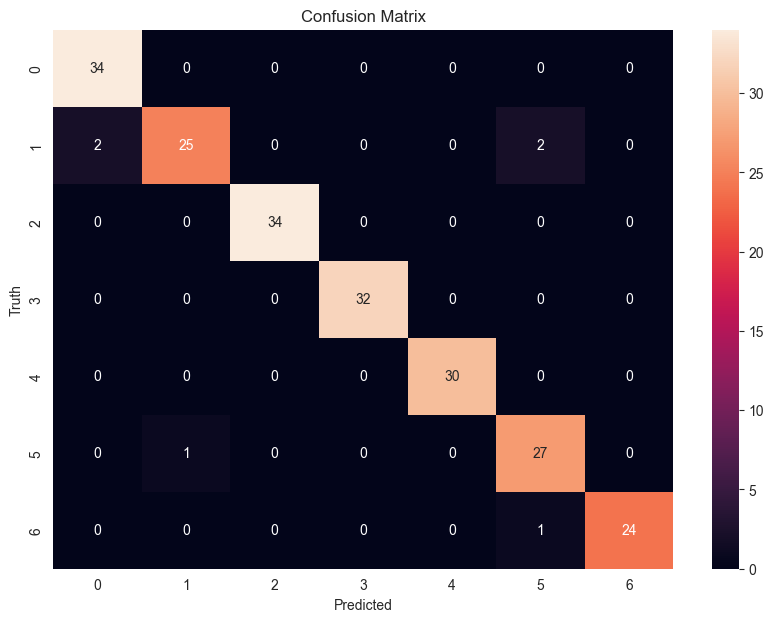

In [137]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Predicting on a single example

In [150]:
test_example = pd.DataFrame([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'])

In [151]:
test_example

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [152]:
prediction = model.predict(test_example)
print('The prediction of obesity level is:', le.classes_[prediction][0])

The prediction of obesity level is: Insufficient_Weight


## Saving the model

In [153]:
import pickle

# Save the model to disk
filename = 'final_model.pkl'
pickle.dump(model, open(filename, 'wb'))